# Geographical data
I will be using data obtained __[here](https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore)__. 

When installing `geopandas` and loading data I encountered the following error: 

`AttributeError: module ‘lib’ has no attribute ‘OpenSSL_add_all_algorithms’`

As it turned out, I had to upgrade the `pyopenssl` library to version >22.1.0. In the __[official installation guide](https://geopandas.org/en/stable/getting_started/install.html)__, it is recommended to use a virtual environment to avoid such package conflicts.


In [1]:
import geopandas
import pickle

path = '../'

In [2]:
gdf = geopandas.read_file(path + 'data/geo/world/world.shp')
gdf

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


## Playing around
Geodataframe works pretty much like regular dataframe. The most important column is `geometry` (polygon...). Other columns are mostly useless.

<Axes: >

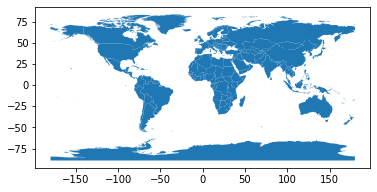

In [3]:
gdf.plot()

## Save our data separately

In [4]:
balkan = gdf[(gdf['ISO'] == 'SI') | (gdf['ISO'] == 'HR') | (gdf['ISO'] == 'RS') | (gdf['ISO'] == 'RO') | (gdf['ISO'] == 'BG') | (gdf['ISO'] == 'GR')]

In [5]:
balkan = balkan[['ISO', 'COUNTRY', 'geometry']]
balkan

,ISO,COUNTRY,geometry
35,BG,Bulgaria,"POLYGON ((22.93560 41.34213, 22.95590 41.35562..."
57,HR,Croatia,"MULTIPOLYGON (((17.57853 42.94383, 17.51889 42..."
89,GR,Greece,"MULTIPOLYGON (((21.08305 39.05666, 21.04527 39..."
183,RO,Romania,"POLYGON ((24.31971 43.69664, 24.30778 43.69749..."
200,RS,Serbia,"POLYGON ((20.07142 42.56091, 20.09993 42.65770..."
206,SI,Slovenia,"POLYGON ((15.30709 45.62986, 15.29400 45.59454..."


In [6]:
with open(path + 'data/clean/balkan.pkl', 'wb') as f:
    pickle.dump(balkan, f)

In [7]:
with open(path + 'data/clean/balkan.pkl', 'rb') as f:
    balkan2 = pickle.load(f)
balkan2

,ISO,COUNTRY,geometry
35,BG,Bulgaria,"POLYGON ((22.93560 41.34213, 22.95590 41.35562..."
57,HR,Croatia,"MULTIPOLYGON (((17.57853 42.94383, 17.51889 42..."
89,GR,Greece,"MULTIPOLYGON (((21.08305 39.05666, 21.04527 39..."
183,RO,Romania,"POLYGON ((24.31971 43.69664, 24.30778 43.69749..."
200,RS,Serbia,"POLYGON ((20.07142 42.56091, 20.09993 42.65770..."
206,SI,Slovenia,"POLYGON ((15.30709 45.62986, 15.29400 45.59454..."


## Aditional data for the sample dashboard

In [8]:
import pandas as pd

In [9]:
codes = ['SI', 'RS', 'HR', 'RO', 'BG', 'GR']
dfs = []

for c in codes:
    cpath = path + 'data/clean/' + c + '_clean.pkl'
    with open(cpath, 'rb') as f:
        df = pickle.load(f)
    
    df = pd.DataFrame((df[['DayAheadPrice', 'LoadActual']].mean())).T
    dfs.append(df)
    
all = pd.concat(dfs).reset_index(drop=True)
all['ISO'] = codes
all

,DayAheadPrice,LoadActual,ISO
0,256.594726,1542.894602,SI
1,255.913418,3975.014982,RS
2,254.113384,2080.214623,HR
3,247.822042,6438.243929,RO
4,244.858018,4426.697396,BG
5,265.297676,5565.751130,GR


In [10]:
with open(path + 'data/clean/gis_demo.pkl', 'wb') as f:
    pickle.dump(all, f)